In [3]:
from importlib import reload
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
import os
import random
from tqdm import tqdm
import copy

import time
import torch
from torchvision import models, transforms
from autoencoder import Autoencoder as AE

import gnf

# Load data

In [9]:
from PIL import Image

(110592, 5)

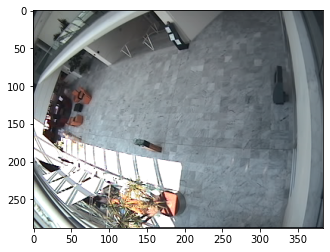

In [30]:
# median_image = np.zeros((1,288,384,3))
images = []
root = './data/foreground_detection_train/'

# Build median frame
for file in os.listdir(root):
    img = Image.open(os.path.join(root, file))
    np_img = np.array(img)
    
    images.append(np_img)
            
images = np.array(images)
median_np = np.median(images, axis=0) / 255.0
    
# Show median frame
%matplotlib inline
plt.imshow(median_np)

# Extract features for median frame
median_feats = np.zeros((1, 5))
for y, y_img in enumerate(median_np):
    for x, x_img in enumerate(y_img):
        feats = np.array([x, y, x_img[0], x_img[1], x_img[2]])
        median_feats = np.append(median_feats, [feats], axis=0)
median_feats = median_feats[1:]

median_feats.shape

# Show GNF reduced image?

# Train GNG and GNF on same dataset

In [34]:
# Train gnf on median frame features
reload(gnf)
gnf_model = gnf.GNF()
neurons, error = gnf_model.train(median_feats,
                epochs=1000, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=1,
                random_init=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:29<00:00,  1.76it/s]


In [36]:
len(neurons)

201

In [37]:
error[-1]

406.3359837538218

In [38]:
import gng
reload(gng)
gng_model = gng.GNG()
gng_neurons, gng_error = gng_model.train(median_feats,
                epochs=1000, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=1,
                random_init=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:42<00:00,  1.72it/s]


In [39]:
len(gng_neurons)

201

In [40]:
gng_error[-1]

246.30678750306237

# Test foreground detection?